# Applied Data Science - Course Project No1 (Andreas Haile)

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## A. Importing, cleaning and numerical summaries

**1. Download the data set data.csv from the Resources tab**

**2. Import the data as a pandas DataFrame**

In [49]:
df = pd.read_csv('HappinessDataset.csv')
df.head(5)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


**3. Check the number of observations**

In [50]:
len(df.index)

153

In [51]:
df['Country'].count()

153

**4. Obtain the column headings**

In [52]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

**5. Check the data type for each column**

In [53]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

**6. Check if there are any missing values**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


With this command (`info()`), we have a good summary of what constitut our dataframe. We can see that we have 153 observations and 12 columns (variables). The data type of each variables is also displayed. For the variable "Job Satisfaction", we are missing 2 values.

In [57]:
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

**7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type**

In [5]:
pd.isnull(df).any(1).nonzero()[0]

/Users/Andy/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


array([43, 61])

In [6]:
df.loc[(43,61),]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
43,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
61,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [7]:
df.dropna(axis=0, inplace = True) # With this command we are removing the two observations above from our dataset

**8. Obtain the mean, minimum and maximum value for each column containing numerical data**

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


**9. List the 10 happiest countries, ordered by their happiness score**

In [9]:
df.loc[df['Happiness Rank'] <= 10].sort_values(by = 'Happiness Score', ascending = False)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


**10. List the 10 least happy countries, ordered by their happiness score**

In [10]:
df.loc[df['Happiness Rank'] >= 145].sort_values(by = 'Happiness Score', ascending = True)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


As we removed observations with missing values, the 147th happiest country (South Soudan) is not appearing here. Therefore, these are the 10 least happy countries (ordered from the least happy to the happiest).

## B. Indexing and grouping

**1. Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions**

In [11]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

Hereabove, we can see that "Region" is of type "object".

- To get the different categories of the variable "Region" we need to change its type from "object" to "category", as follows : 

In [12]:
df['Region'] = df.Region.astype('category')

- We can now see the transformation :

In [13]:
df.dtypes

Country               object
Happiness Rank         int64
Happiness Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Generosity           float64
Corruption           float64
Dystopia             float64
Job Satisfaction     float64
Region              category
dtype: object

In [14]:
df['Region'].cat.categories

Index(['Africa', 'Asia-Pacific', 'Eastern Europe', 'Europe', 'Latin America',
       'North America', 'Western Europe'],
      dtype='object')

- We are now going to create `.csv` files for each of the region listed above :

In [15]:
Africa = df[df['Region'] == 'Africa']
Africa.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/Africa.csv', index = False)

In [16]:
AsiaPacific = df[df['Region'] == 'Asia-Pacific']
AsiaPacific.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/AsiaPacific.csv', index = False)

In [17]:
EasternEurope = df[df['Region'] == 'Eastern Europe']
EasternEurope.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/EasternEurope.csv', index = False)

In [18]:
Europe = df[df['Region'] == 'Europe']
Europe.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/Europe.csv', index = False)

In [19]:
LatinAmerica = df[df['Region'] == 'Latin America']
LatinAmerica.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/LatinAmerica.csv', index = False)

In [20]:
NorthAmerica = df[df['Region'] == 'North America']
NorthAmerica.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/NorthAmerica.csv', index = False)

In [21]:
WesternEurope = df[df['Region'] == 'Western Europe']
WesternEurope.to_csv(r'/Users/Andy/Desktop/Python EPFL-Exts/Unit 1/Course Project no1/WesternEurope.csv', index = False)

The path needs to be changed by the person who wants to reproduce the code.

**2. Compute the mean happiness score for each region and rank the regions from most happy to least happy**

In [22]:
df.groupby('Region')['Happiness Score'].mean().sort_values(ascending = False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.498952
Asia-Pacific      5.358326
Africa            4.254581
Europe            4.096000
Name: Happiness Score, dtype: float64

**3. Compute the number of countries in each region that have a happiness score above 6.0**

In [23]:
subset_above6 = df.loc[df['Happiness Score'] > 6]

In [24]:
subset_above6['Region'].value_counts()

Western Europe    17
Latin America     13
Asia-Pacific      11
North America      2
Eastern Europe     1
Europe             0
Africa             0
Name: Region, dtype: int64

**4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?**

In [25]:
Africa['Happiness Score'].max() - Africa['Happiness Score'].min()

3.179000139

In [26]:
AsiaPacific['Happiness Score'].max() - AsiaPacific['Happiness Score'].min()

3.852000237

In [27]:
EasternEurope['Happiness Score'].max() - EasternEurope['Happiness Score'].min()

1.4539999969999995

In [28]:
Europe['Happiness Score'].max() - Europe['Happiness Score'].min()

0.0

The result above is normal, as there is only 1 country (Ukraine) categorized in 'Europe'.

In [29]:
LatinAmerica['Happiness Score'].max() - LatinAmerica['Happiness Score'].min()

3.4760000700000004

In [30]:
NorthAmerica['Happiness Score'].max() - NorthAmerica['Happiness Score'].min()

0.32299995400000014

In [31]:
WesternEurope['Happiness Score'].max() - WesternEurope['Happiness Score'].min()

2.3420000069999993

The region with the largest range is Asia-Pacific.

## C. Bar plot of the Happiness Score

**1. Obtain a horizontal bar plot of the Happiness Score of the top 10 happiest countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels**

In [32]:
df_Happiest = df.loc[df['Happiness Rank'] <= 10].sort_values(by = 'Happiness Rank')

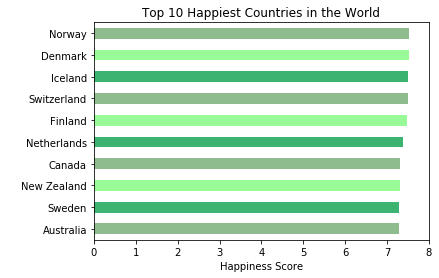

In [34]:
df_Happiest.plot.barh(x='Country', y='Happiness Score', legend = None, 
                      color=['darkseagreen', 'palegreen', 'mediumseagreen', 
                             'darkseagreen', 'palegreen', 'mediumseagreen',
                             'darkseagreen', 'palegreen', 'mediumseagreen',
                             'darkseagreen']) 

plt.xlabel("Happiness Score");
plt.ylabel(" ");
plt.title("Top 10 Happiest Countries in the World");
plt.xticks([0,1,2,3,4,5,6,7,8]); 
plt.gca().invert_yaxis();

**2. You will now adapt the code for the horizontal bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns**

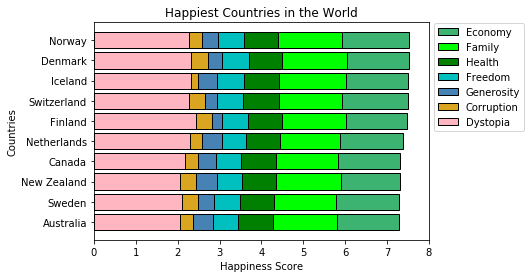

In [36]:
xc = df_Happiest['Country']
y1 = df_Happiest['Economy']
y2 = df_Happiest['Family']
y3 = df_Happiest['Health']
y4 = df_Happiest['Freedom']
y5 = df_Happiest['Generosity']
y6 = df_Happiest['Corruption']
y7 = df_Happiest['Dystopia']
  
plt.barh(xc, y1, color='mediumseagreen', edgecolor='black', left=y2+y3+y4+y5+y6+y7, label='Economy')
plt.barh(xc, y2, color='lime', edgecolor='black', left=y3+y4+y5+y6+y7, label='Family')
plt.barh(xc, y3, color='g', edgecolor='black',left=y4+y5+y6+y7, label='Health')
plt.barh(xc, y4, color='c', edgecolor='black',left=y5+y6+y7, label='Freedom')
plt.barh(xc, y5, color='steelblue', edgecolor='black',left=y6+y7, label='Generosity')
plt.barh(xc, y6, color='goldenrod', edgecolor='black',left=y7, label='Corruption')
plt.barh(xc, y7, color='lightpink', edgecolor='black', label='Dystopia')


plt.ylabel('Countries');
plt.xlabel("Happiness Score");
plt.title("Happiest Countries in the World");
plt.xticks([0,1,2,3,4,5,6,7,8]); 
plt.legend(bbox_to_anchor = (1.3, 1.02));
plt.gca().invert_yaxis();

**3. Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa**

In [42]:
Africa_barh = df.loc[df['Region'] == 'Africa'].sort_values(by = 'Happiness Score', ascending = False)
Africa_barh.head(5)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
29,Algeria,53,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,68.6,Africa
58,Mauritius,64,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584,86.0,Africa
35,Libya,68,5.525,1.101803,1.357564,0.520169,0.465733,0.152074,0.092610,1.835011,75.8,Africa
130,Morocco,84,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,64.8,Africa
28,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,79.9,Africa


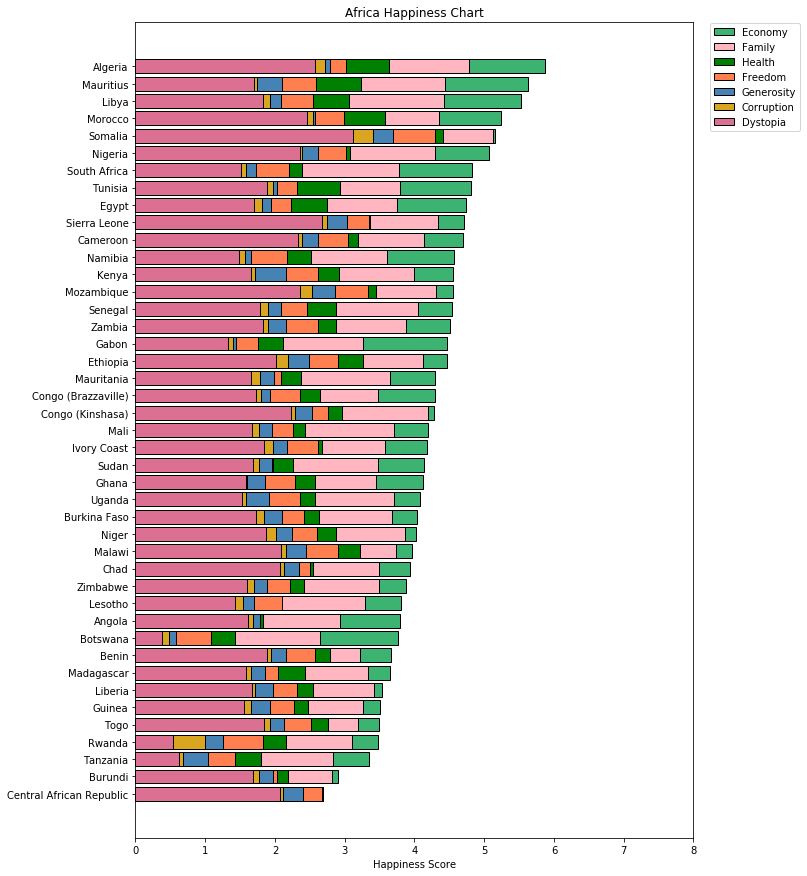

In [39]:
xa = Africa_barh['Country']
a1 = Africa_barh['Economy']
a2 = Africa_barh['Family']
a3 = Africa_barh['Health']
a4 = Africa_barh['Freedom']
a5 = Africa_barh['Generosity']
a6 = Africa_barh['Corruption']
a7 = Africa_barh['Dystopia']
      
plt.figure(figsize=(10,15));
plt.barh(xa, a1, color='mediumseagreen', edgecolor='black', left=a2+a3+a4+a5+a6+a7, label='Economy')
plt.barh(xa, a2, color='lightpink', edgecolor='black', left=a3+a4+a5+a6+a7, label='Family')
plt.barh(xa, a3, color='g', edgecolor='black',left=a4+a5+a6+a7, label='Health')
plt.barh(xa, a4, color='coral', edgecolor='black',left=a5+a6+a7, label='Freedom')
plt.barh(xa, a5, color='steelblue', edgecolor='black',left=a6+a7, label='Generosity')
plt.barh(xa, a6, color='goldenrod', edgecolor='black',left=a7, label='Corruption')
plt.barh(xa, a7, color='palevioletred', edgecolor='black', label='Dystopia')

plt.ylabel('');
plt.xlabel("Happiness Score");
plt.title("Africa Happiness Chart");
plt.xticks([0,1,2,3,4,5,6,7,8]);
plt.legend(bbox_to_anchor = (1.2, 1.005));
plt.gca().invert_yaxis();
plt.show()

## D. Histogram of Job Satisfaction

**Obtain a histogram of the Job Satisfaction using the following categories**

- 40%-50%
- 50%-60%
- 60%-70%
- 70%-80%
- 80%-90%
- 90%-100%


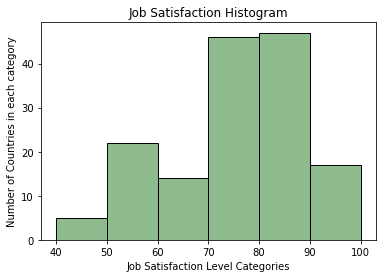

In [47]:
hist_JS = df['Job Satisfaction'].plot.hist(bins=[40, 50, 60, 70, 80, 90, 100], color='darkseagreen', edgecolor='black')
hist_JS.set_xlabel('Job Satisfaction Level Categories')
hist_JS.set_ylabel('Number of Countries in each category')
hist_JS.set_title('Job Satisfaction Histogram')
plt.show()

## E. Pairwise Scatter plots

**Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot**

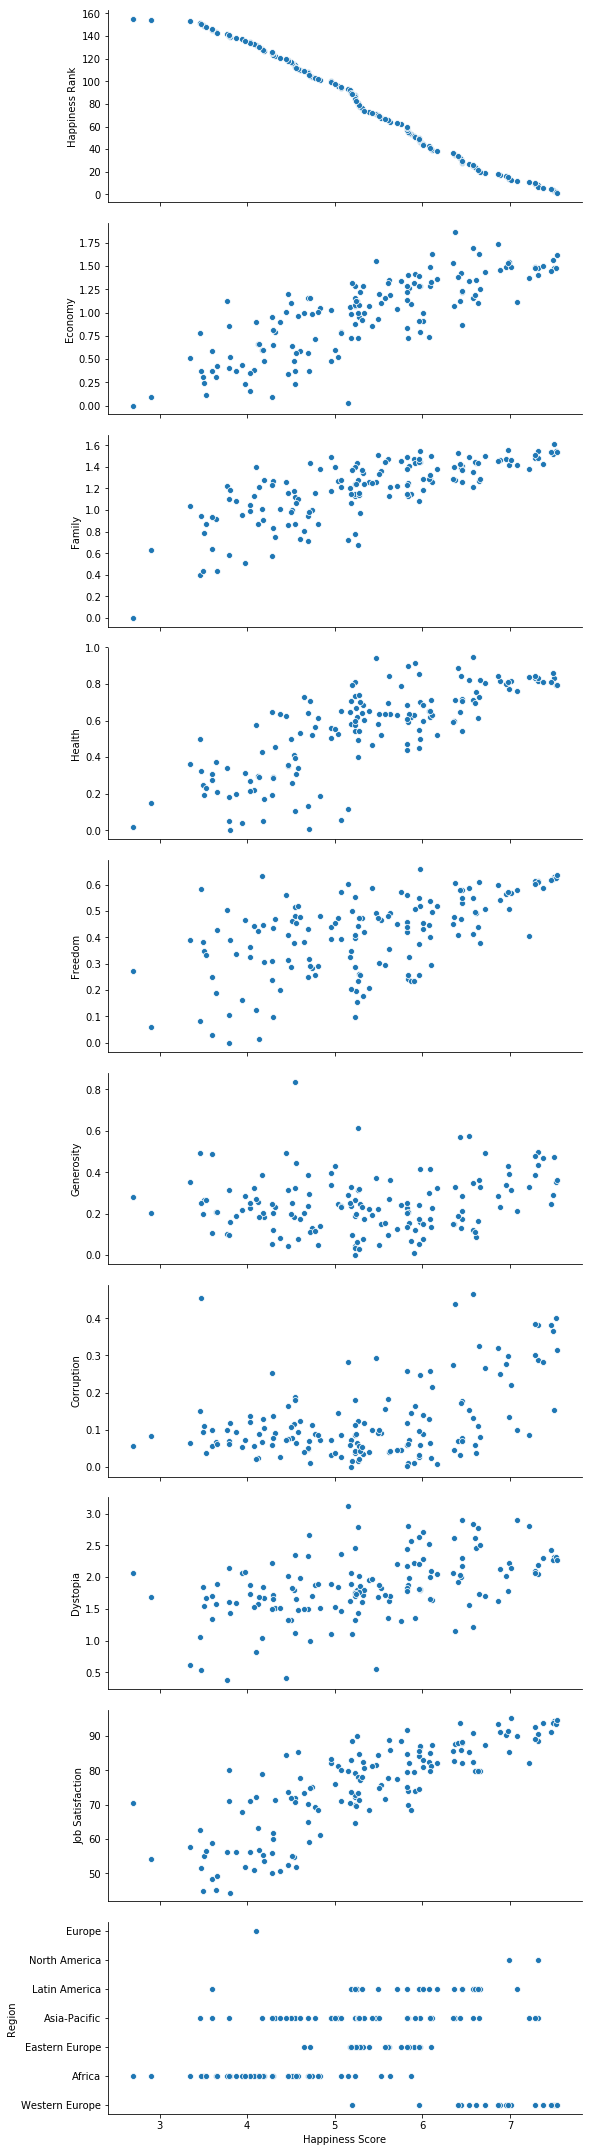

In [52]:
sns.pairplot(data = df, x_vars = ['Happiness Score'], y_vars = ['Happiness Rank','Economy', 'Family', 'Health', 
                                                                'Freedom','Generosity', 'Corruption', 'Dystopia',
                                                                'Job Satisfaction','Region'], height = 3, 
                                                                 aspect = 2.5);

## F. Correlation

**Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?**

In [53]:
df.corr()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Rank,1.000000,-0.992663,-0.809521,-0.733902,-0.776602,-0.550111,-0.142348,-0.415532,-0.489194,-0.814535
Happiness Score,-0.992663,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873
Economy,-0.809521,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620,0.700662
Family,-0.733902,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480,0.623266
Health,-0.776602,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886,0.704795
Freedom,-0.550111,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923,0.500655
Generosity,-0.142348,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683,0.220032
Corruption,-0.415532,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995,0.337131
Dystopia,-0.489194,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000,0.281655
Job Satisfaction,-0.814535,0.812873,0.700662,0.623266,0.704795,0.500655,0.220032,0.337131,0.281655,1.000000


This matrix gives us the correlations between all the variables of our dataframe, taken pairwise. Our line of interest is the second one on the table (we can also look at the second column), concerning the correlations of the 'Happiness Score' with all the other variables. 

If we omit the correlation between the 'Happiness Score' and the 'Happiness Rank', because their relationship is obvious, the highest correlation is with the 'Job Satisfaction'. The higher the latter, the higher the 'Happiness Score' will be.

We can note that the 'Economy' has almost the same impact as the 'Job Satisfaction' on the 'Happiness Score'.

## G. Probabilities

**Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities**

In [62]:
df['Country'].count()

151

In [63]:
df['Country'][df['Happiness Score']> 6].count() # 44 countries with a score above 6.0

44

In [64]:
df['Country'][(df['Happiness Score'] > 6) & (df['Region'] == 'Western Europe')].count()

17

In [65]:
df['Country'][(df['Happiness Score'] > 6) & (df['Region'] == 'Western Europe')].count()/df['Country'].count()

0.11258278145695365

If we randomly selected a country, we would have 11.2% chances to select a country from 'Western Europe' with a 'Happiness Score' above 6. 

### Correction

How many countries are in Western Europe if they have a Happiness Score above 6 ?

In [17]:
df['Country'][df['Happiness Score'] > 6].count() # Nombre total de pays avec un score > 6

44

In [46]:
df['Country'][(df['Region'] == 'Western Europe') & (df['Happiness Score'] > 6)].count() 

# Nombre de pays d'Europe de l'Ouest avec un score > 6

17

In [60]:
df['Country'][(df['Region'] == 'Western Europe') & (df['Happiness Score'] > 6)].count()/df['Country'][df['Happiness Score'] > 6].count()

0.38636363636363635

## H. Matrices

**Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise**

In [54]:
df['Region'].cat.categories

Index(['Africa', 'Asia-Pacific', 'Eastern Europe', 'Europe', 'Latin America',
       'North America', 'Western Europe'],
      dtype='object')

In [55]:
RegionNames = df['Region'].unique()
RegionNames

[Western Europe, Africa, Eastern Europe, Asia-Pacific, Latin America, North America, Europe]
Categories (7, object): [Western Europe, Africa, Eastern Europe, Asia-Pacific, Latin America, North America, Europe]

In [57]:
Matrix = pd.DataFrame(0, index = df['Country'], columns=RegionNames) # Creation empty dataframe
Matrix.head(5)

,Western Europe,Africa,Eastern Europe,Asia-Pacific,Latin America,North America,Europe
Country,,,,,,,
Malta,0,0,0,0,0,0,0
Zimbabwe,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0
Iran,0,0,0,0,0,0,0
Mexico,0,0,0,0,0,0,0


In [330]:
for my_region in RegionNames:
    print(my_region)

Africa
AsiaPacific
EasternEurope
Europe
LatinAmerica
NorthAmerica
WesternEurope


In [59]:
df[df['Country'] == 'Malta']['Region']

0    Western Europe
Name: Region, dtype: category
Categories (7, object): [Africa, Asia-Pacific, Eastern Europe, Europe, Latin America, North America, Western Europe]

In [60]:
for my_country in Matrix.index:
    for my_region in RegionNames:
        if (df[df.Country == my_country]['Region'] == my_region).bool():
            Matrix.loc[my_country][my_region] = 1

Matrix

,Western Europe,Africa,Eastern Europe,Asia-Pacific,Latin America,North America,Europe
Country,,,,,,,
Malta,1,0,0,0,0,0,0
Zimbabwe,0,1,0,0,0,0,0
Cyprus,0,0,1,0,0,0,0
Iran,0,0,0,1,0,0,0
Mexico,0,0,0,0,1,0,0
New Zealand,0,0,0,1,0,0,0
Poland,0,0,1,0,0,0,0
Egypt,0,1,0,0,0,0,0
Senegal,0,1,0,0,0,0,0
